#**E-commerce customer segmentation**

---



##**Problem Statement**
###1.As an e-commerce platform, it is very important to profile your customers, dividing your clientele base into groups based on their needs and expectations. Grouping will help us come up with dedicated marketing strategies and will aid us in recommending products to different user bases. 
###2.In this project, we are interested in analyzing the content of an E-commerce database that lists purchases made by ∼4000 customers over a period of one year (1/12/2010 to 9/12/2011). 
###3.Based on this analysis, we would like to develop models to group the 4000 customers into different buckets. 
###4.Such a model must take into account the similarity between the products purchased between the users (i.e. a user might purchase 2 different products which are very similar to each other), the spending patterns of a user, their meta information, etc. 

##**Minimum Requirements**
####The end objective of the participant is to come up with customer segmentations that take into account all the information that is presented in the dataset. The participant is expected to use NLP techniques to find similarity between the products. 

###Importing the data

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
import datetime, nltk, warnings
from nltk.stem import PorterStemmer
%matplotlib inline

In [227]:
df = pd.read_csv('ecommerce.csv',encoding= 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [228]:
df.shape

(541909, 8)

In [229]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [230]:
df.dropna(axis = 0, subset = ['Description'], inplace = True)

In [231]:
df.dropna(axis = 0, subset = ['CustomerID'], inplace = True)

In [232]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [233]:
df.shape

(406829, 8)

In [234]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [235]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [236]:
df['Description'].astype(str) #converting description to string

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 406829, dtype: object

## **Pre-processing the data**
##Encoding-NPL

Removing punctuation (.!<>{}’,”(/)-)

In [237]:
df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 406829, dtype: object

In [238]:
# Replacing punctuations with space
df['processed_Description'] = df['Description'].str.replace("[^a-zA-Z]"," ")
df

<ipython-input-238-02868f23d0e2>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['processed_Description'] = df['Description'].str.replace("[^a-zA-Z]"," ")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,processed_Description
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,WHITE HANGING HEART T LIGHT HOLDER
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,WHITE METAL LANTERN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,PACK OF SPACEBOY NAPKINS
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,CHILDREN S APRON DOLLY GIRL
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE


In [239]:
# df['processed_Description']  = pd.DataFrame(df['Description'].unique()).rename(columns = {0:'Description'})
# df['processed_Description']

In [ ]:
# df.dropna(axis = 0, subset = ['processed_Description'], inplace = True)
# df['processed_Description']

0        WHITE HANGING HEART T-LIGHT HOLDER
1                       WHITE METAL LANTERN
2            CREAM CUPID HEARTS COAT HANGER
3       KNITTED UNION FLAG HOT WATER BOTTLE
4            RED WOOLLY HOTTIE WHITE HEART.
                       ...                 
3891              LETTER "W" BLING KEY RING
3892              LETTER "Z" BLING KEY RING
3893         PINK CRYSTAL SKULL PHONE CHARM
3894     CREAM HANGING HEART T-LIGHT HOLDER
3895            PAPER CRAFT , LITTLE BIRDIE
Name: processed_Description, Length: 2745, dtype: object

Replacing short words

In [240]:
df['processed_Description']

0          WHITE HANGING HEART T LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART 
                         ...                 
541904            PACK OF    SPACEBOY NAPKINS
541905           CHILDREN S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET   PIECE RETROSPOT 
Name: processed_Description, Length: 406829, dtype: object

In [241]:
df['processed_Description'] = df['processed_Description'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [242]:
df['processed_Description']

0            WHITE HANGING HEART LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4               RED WOOLLY HOTTIE WHITE HEART
                         ...                 
541904                  PACK SPACEBOY NAPKINS
541905              CHILDREN APRON DOLLY GIRL
541906           CHILDRENS CUTLERY DOLLY GIRL
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908             BAKING SET PIECE RETROSPOT
Name: processed_Description, Length: 406829, dtype: object

LowerCase character

In [243]:
# porter = PorterStemmer()
# df['processed_Description'] = [porter.stem(word) for word in df['processed_Description']]
df['processed_Description'] = [row.lower() for row in df['processed_Description']]

In [244]:
df['processed_Description']

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
541904                  pack spaceboy napkins
541905              children apron dolly girl
541906           childrens cutlery dolly girl
541907        childrens cutlery circus parade
541908             baking set piece retrospot
Name: processed_Description, Length: 406829, dtype: object

Remove stop words

In [245]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')

# # Making custom list of words to be removed 
# add_words = ['red','blue','pink','white','black','dark','pack','yellow','orange']

# # Adding to the list of words
# stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['processed_Description'] = [remove_stopwords(r) for r in df['processed_Description']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [246]:
df['processed_Description']

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
541904                  pack spaceboy napkins
541905              children apron dolly girl
541906           childrens cutlery dolly girl
541907        childrens cutlery circus parade
541908             baking set piece retrospot
Name: processed_Description, Length: 406829, dtype: object

In [247]:
df1 = pd.DataFrame(df['processed_Description'].unique()).rename(columns = {0:'processed_Description'})
df1

,processed_Description
0,white hanging heart light holder
1,white metal lantern
2,cream cupid hearts coat hanger
3,knitted union flag hot water bottle
4,red woolly hottie white heart
...,...
3758,set ribbons perfectly pretty
3759,set ribbons party
3760,pink crystal skull phone charm
3761,cream hanging heart light holder


Lemmatization

In [248]:
# Begin Lemmatization 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df1['processed_Description'] = df1['processed_Description'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [249]:
df1['processed_Description']

0          white hang heart light holder
1                    white metal lantern
2          cream cupid heart coat hanger
3       knit union flag hot water bottle
4          red woolly hottie white heart
                      ...               
3758         set ribbon perfectly pretty
3759                    set ribbon party
3760      pink crystal skull phone charm
3761       cream hang heart light holder
3762           paper craft little birdie
Name: processed_Description, Length: 3763, dtype: object

Plotting frequent words

['white', 'hang', 'heart', 'light', 'holder', 'white', 'metal', 'lantern', 'cream', 'cupid', 'heart', 'coat', 'hanger', 'knit', 'union', 'flag', 'hot', 'water', 'bottle', 'red', 'woolly', 'hottie', 'white', 'heart', 'set', 'babushka', 'nesting', 'box', 'glass', 'star', 'frost', 'light', 'holder', 'hand', 'warmer', 'union', 'jack', 'hand', 'warmer', 'red', 'polka', 'dot', 'assort', 'colour', 'bird', 'ornament', 'poppy', 'playhouse', 'bedroom', 'poppy', 'playhouse', 'kitchen', 'feltcraft', 'princess', 'charlotte', 'doll', 'ivory', 'knit', 'mug', 'cosy', 'box', 'assort', 'colour', 'teaspoon', 'box', 'vintage', 'jigsaw', 'block', 'box', 'vintage', 'alphabet', 'block', 'home', 'building', 'block', 'word', 'love', 'building', 'block', 'word', 'recipe', 'box', 'metal', 'heart', 'doormat', 'new', 'england', 'jam', 'making', 'set', 'jar', 'red', 'coat', 'rack', 'paris', 'fashion', 'yellow', 'coat', 'rack', 'paris', 'fashion', 'blue', 'coat', 'rack', 'paris', 'fashion', 'bath', 'building', 'bloc

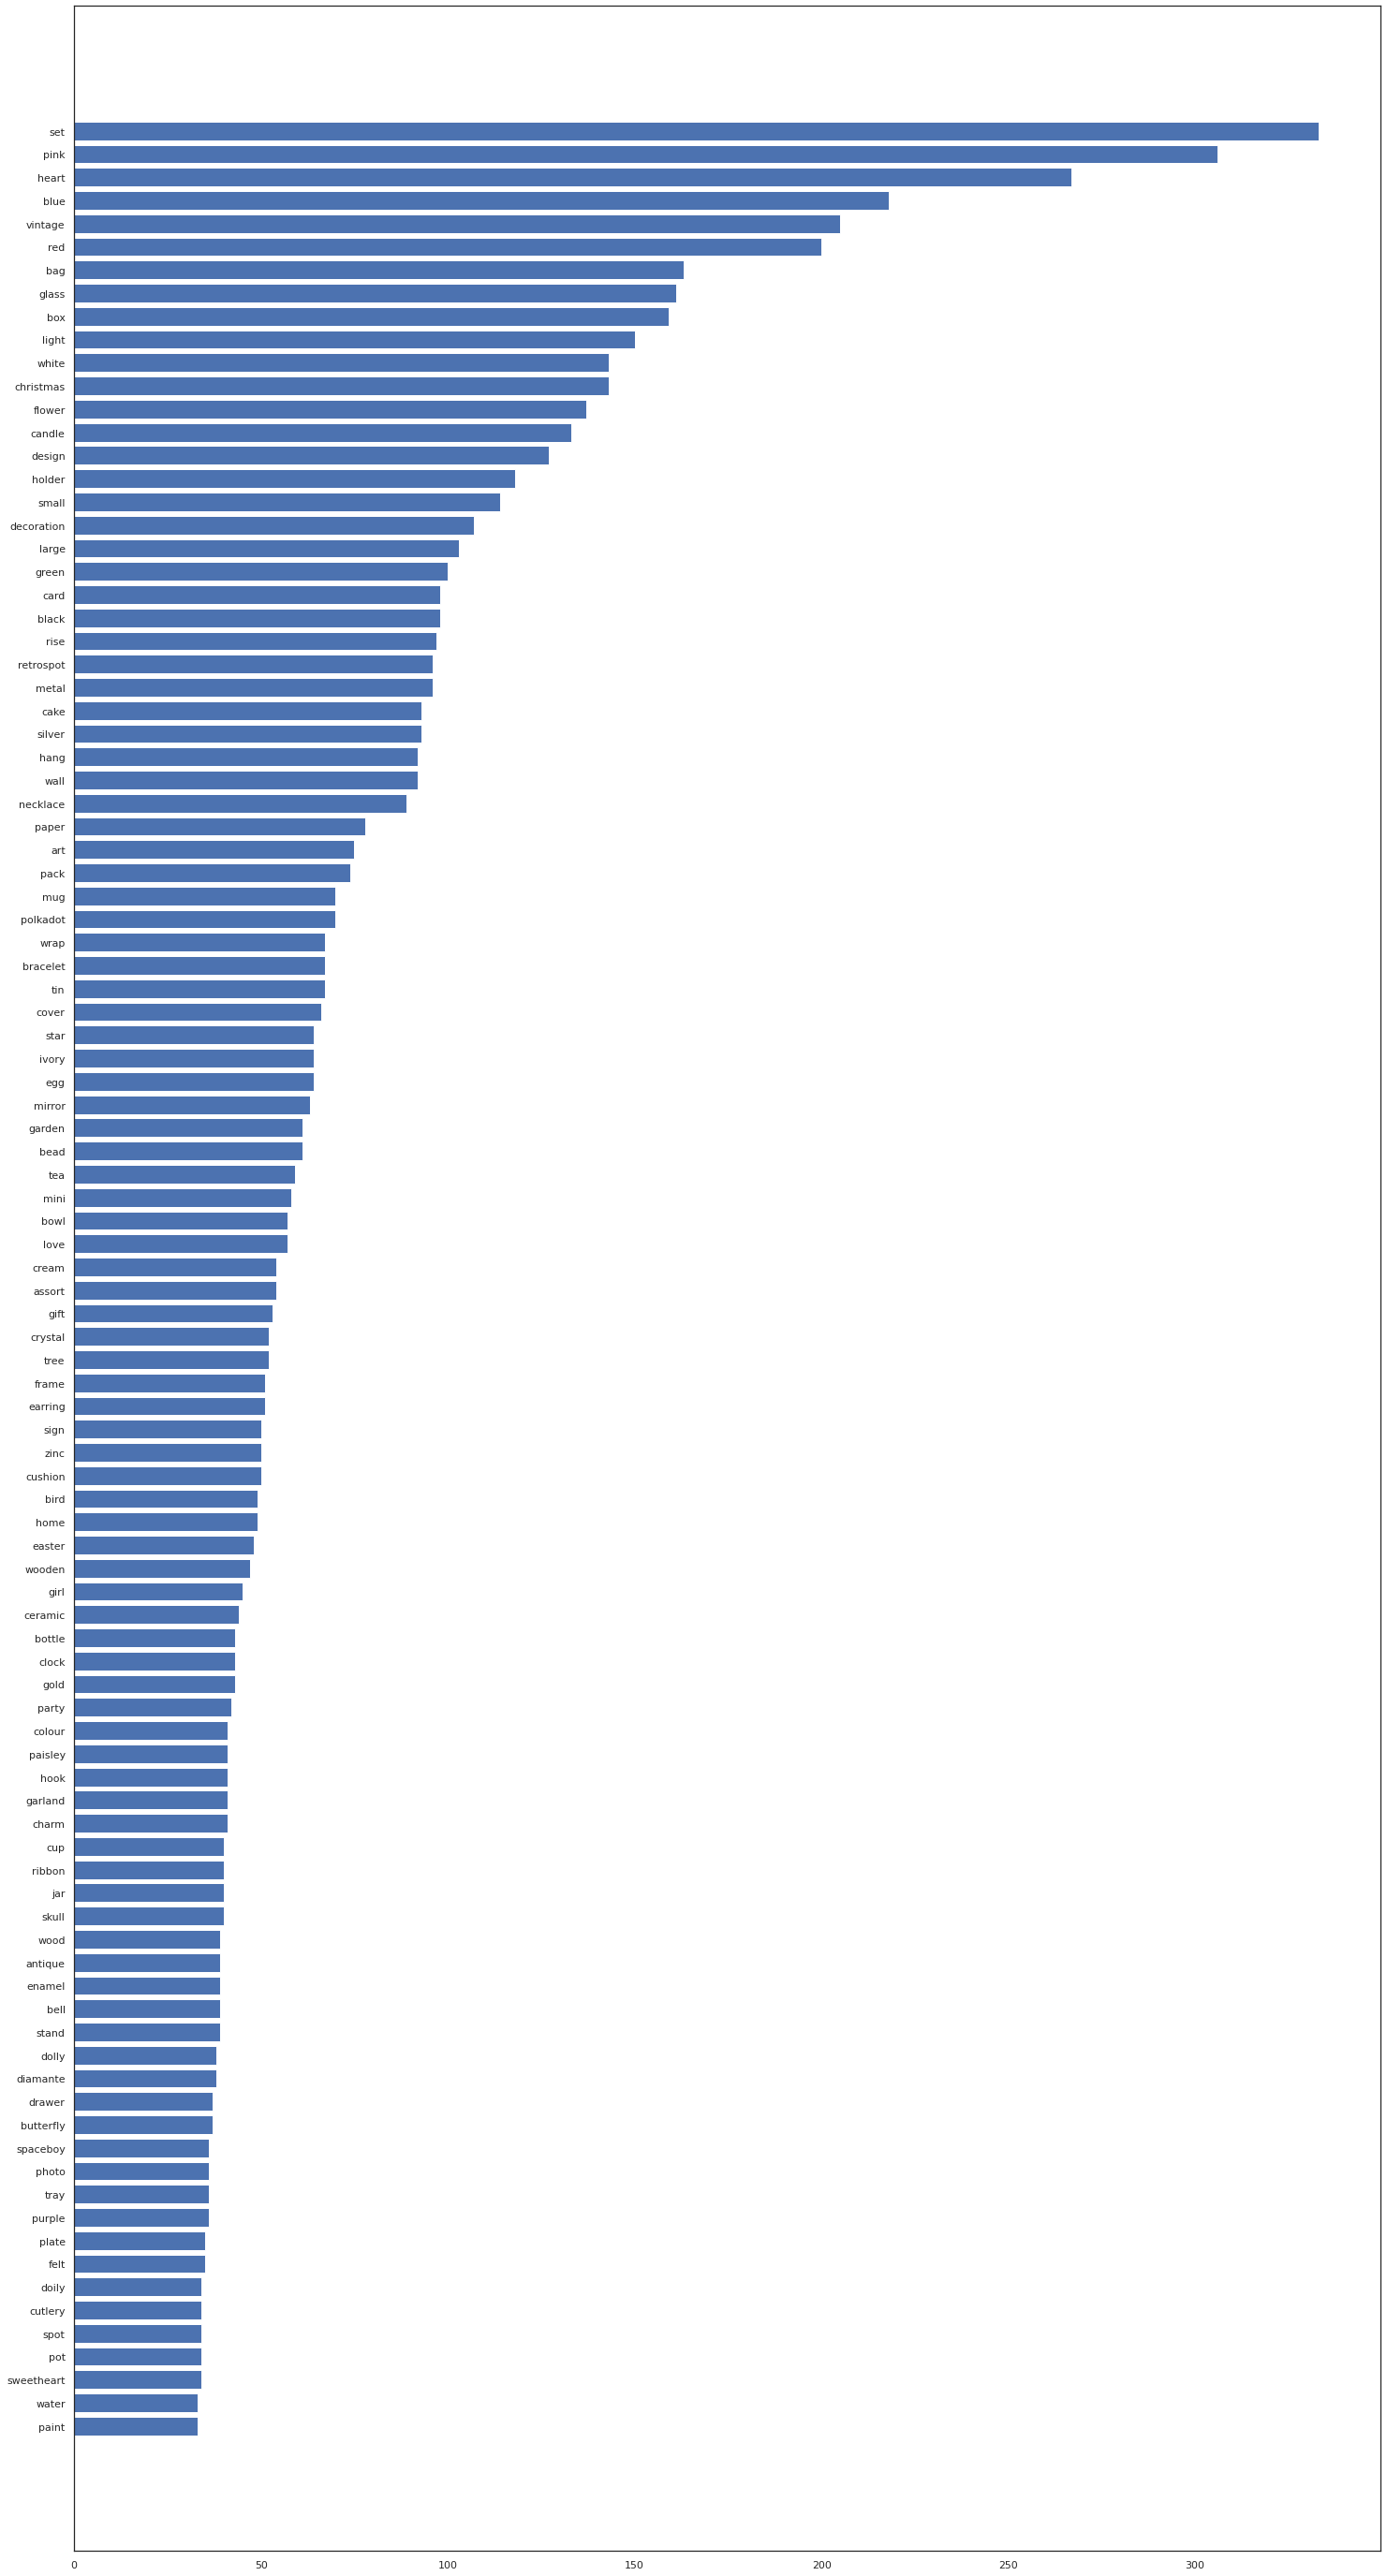

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist 
all_words_df = df1['processed_Description']
all_words = ' '.join([text for text in all_words_df])
all_words = all_words.split()
print(all_words)
words_df = FreqDist(all_words)
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
print(words_df)
words_df = words_df.nlargest(columns="count",n=100) 
words_df.sort_values('count', inplace = True)
plt.figure(figsize=(25,50))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

Word Cloud

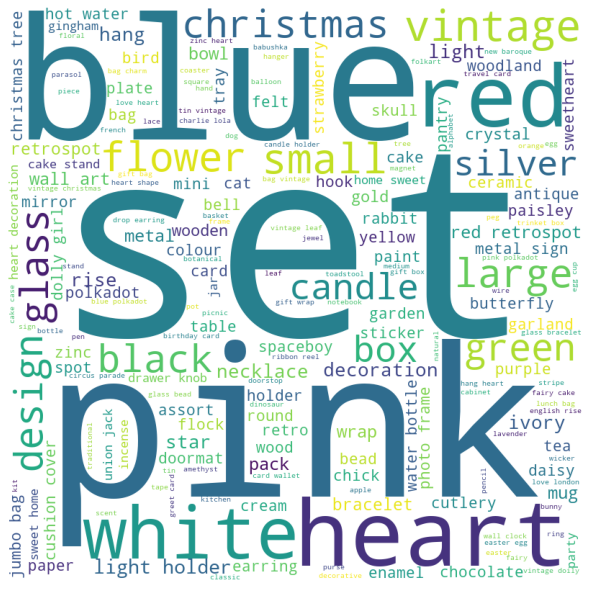

In [251]:
## Bilding a Word Cloud
## 
from wordcloud import WordCloud
# word_cloud_df = df.loc[df['sentiment'] == 'positive',:]
all_words = ' '.join([text for text in df1['processed_Description']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [252]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=250)
X = tfidf.fit_transform(df1['processed_Description']).toarray()
feature_names = tfidf.get_feature_names_out()
df3=pd.DataFrame(X, columns = feature_names)
df3.shape

(3763, 250)

Kmeans Clustering

In [253]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
from sklearn.cluster import KMeans
km = KMeans(n_clusters=20) 
km.fit(X_std)

KMeans(n_clusters=20)

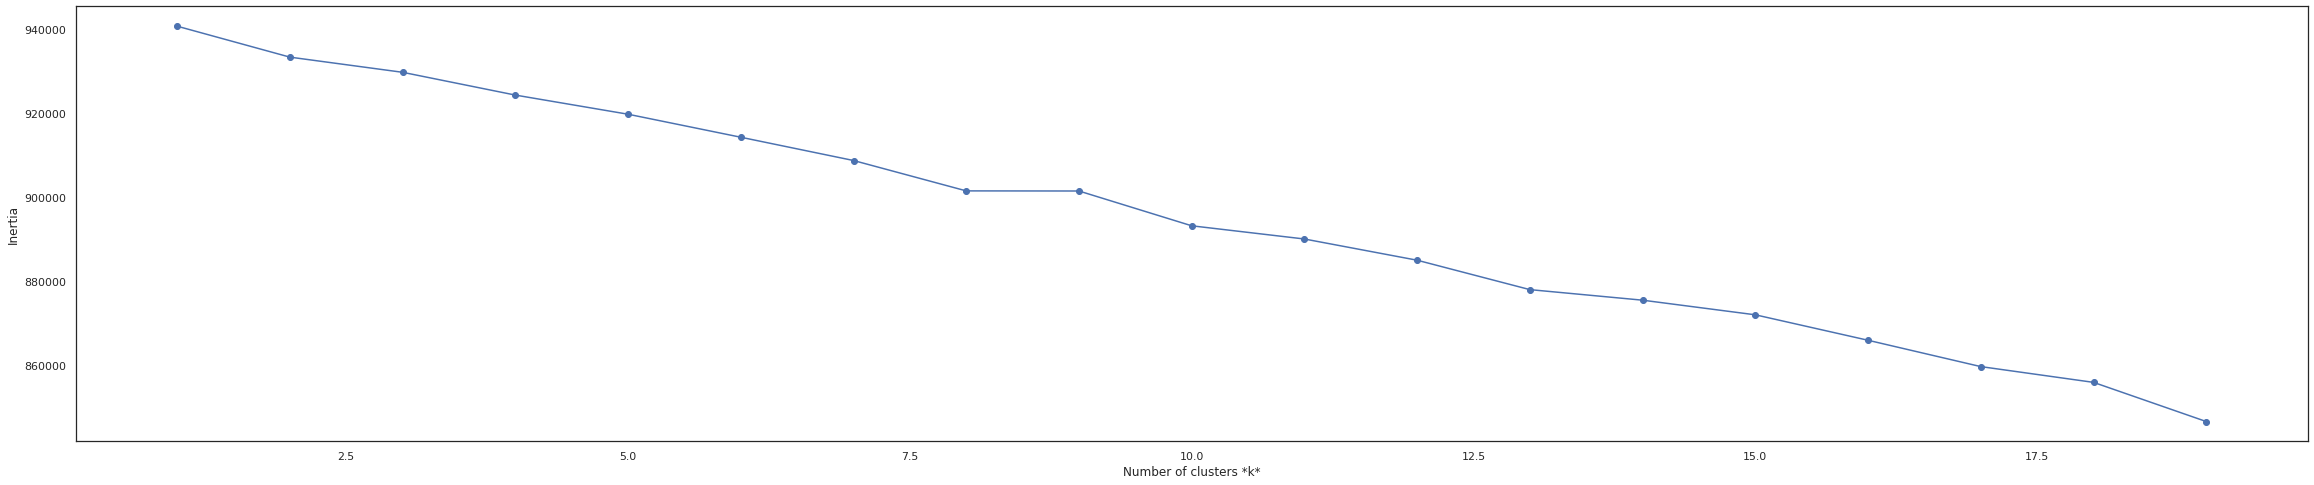

In [254]:
# Elbow plot
# We make a plot between k value and inertia
inertias = []  # storer inertia for all values of k 
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k,init='k-means++',random_state=0)
    km.fit(X_std)
    inertias.append(km.inertia_)
# Plot sse against k
plt.figure(figsize=(40, 8))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia');

In [281]:
km = KMeans(n_clusters=18)
km.fit(X_std) 
centroids = km.cluster_centers_

In [282]:
np.unique(km.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17], dtype=int32)

In [283]:
label = km.fit_predict(X_std)  
print(label)

[4 4 4 ... 3 4 4]


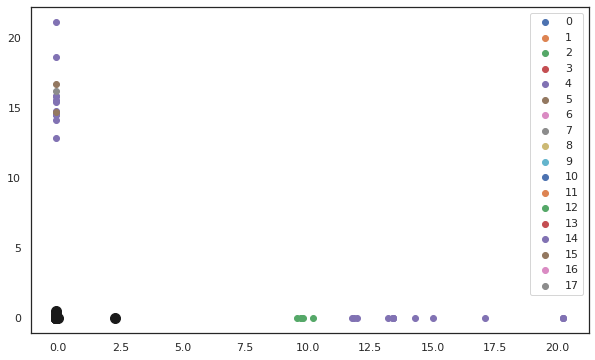

In [284]:
centroids = km.cluster_centers_
labels = np.unique(label)
 
#plotting the results:

plt.figure(figsize=(10, 6)) 
for i in labels:
    plt.scatter(X_std[label == i , 0] , X_std[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, c = 'k')
plt.legend()
plt.show()

In [285]:
df4 = pd.DataFrame(km.labels_)
print(df4.shape)
df4

(3763, 1)


,0
0,4
1,4
2,4
3,5
4,4
...,...
3758,4
3759,4
3760,3
3761,4


In [286]:
print(df1.shape)
df

(3763, 3)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,processed_Description
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,white hanging heart light holder
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,knitted union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,red woolly hottie white heart
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,pack spaceboy napkins
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,children apron dolly girl
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery dolly girl
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery circus parade


In [287]:
df1 = df1.reset_index(drop=True)
df1

,level_0,index,processed_Description
0,0,0,white hang heart light holder
1,1,1,white metal lantern
2,2,2,cream cupid heart coat hanger
3,3,3,knit union flag hot water bottle
4,4,4,red woolly hottie white heart
...,...,...,...
3758,3758,3758,set ribbon perfectly pretty
3759,3759,3759,set ribbon party
3760,3760,3760,pink crystal skull phone charm
3761,3761,3761,cream hang heart light holder


In [288]:
Df = df1.join(df4)
print(Df.shape)
Df

(3763, 4)


,level_0,index,processed_Description,0
0,0,0,white hang heart light holder,4
1,1,1,white metal lantern,4
2,2,2,cream cupid heart coat hanger,4
3,3,3,knit union flag hot water bottle,5
4,4,4,red woolly hottie white heart,4
...,...,...,...,...
3758,3758,3758,set ribbon perfectly pretty,4
3759,3759,3759,set ribbon party,4
3760,3760,3760,pink crystal skull phone charm,3
3761,3761,3761,cream hang heart light holder,4


In [276]:
Df.rename(columns={0:'clusters'},inplace=True) #renaming to clusters
Df.head()

,level_0,index,processed_Description,clusters
0,0,0,white hang heart light holder,1
1,1,1,white metal lantern,1
2,2,2,cream cupid heart coat hanger,1
3,3,3,knit union flag hot water bottle,16
4,4,4,red woolly hottie white heart,1


In [279]:
DF = pd.merge(df, Df, how='left', on='processed_Description') #merging data frame
DF

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,processed_Description,level_0,index,clusters
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,white hanging heart light holder,NaN,NaN,NaN
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,white metal lantern,1.0,1.0,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger,NaN,NaN,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,knitted union flag hot water bottle,NaN,NaN,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,red woolly hottie white heart,4.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
407080,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,pack spaceboy napkins,NaN,NaN,NaN
407081,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,children apron dolly girl,NaN,NaN,NaN
407082,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery dolly girl,2866.0,2866.0,9.0
407083,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery circus parade,2869.0,2869.0,1.0


In [280]:
one_hot=pd.concat([DF, pd.get_dummies(DF["clusters"])],axis=1)
one_hot  

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,processed_Description,level_0,...,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,white hanging heart light holder,NaN,...,0,0,0,0,0,0,0,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,white metal lantern,1.0,...,0,0,0,0,0,0,0,0,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger,NaN,...,0,0,0,0,0,0,0,0,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,knitted union flag hot water bottle,NaN,...,0,0,0,0,0,0,0,0,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,red woolly hottie white heart,4.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407080,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,pack spaceboy napkins,NaN,...,0,0,0,0,0,0,0,0,0,0
407081,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,children apron dolly girl,NaN,...,0,0,0,0,0,0,0,0,0,0
407082,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery dolly girl,2866.0,...,0,1,0,0,0,0,0,0,0,0
407083,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery circus parade,2869.0,...,0,0,0,0,0,0,0,0,0,0


In [289]:
one_hot.groupby(['CustomerID']).mean()

,Quantity,UnitPrice,level_0,index,clusters,0.0,1.0,2.0,3.0,4.0,...,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.000000,1.040000,2522.000000,2522.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
12347.0,13.505495,2.644011,1164.168142,1164.168142,1.840708,0.016484,0.565934,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.038462,0.000000,0.000000
12348.0,75.516129,5.764839,1591.111111,1591.111111,1.000000,0.000000,0.290323,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
12349.0,8.643836,8.289041,1624.157895,1624.157895,1.026316,0.000000,0.506849,0.013699,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
12350.0,11.588235,3.841176,953.428571,953.428571,1.000000,0.000000,0.823529,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,4.500000,4.765000,687.714286,687.714286,1.000000,0.000000,0.700000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
18281.0,7.714286,5.622857,1585.857143,1585.857143,2.142857,0.000000,0.857143,0.000000,0.000000,0.0,...,0.000000,0.142857,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
18282.0,7.538462,4.821538,1732.833333,1732.833333,1.000000,0.000000,0.461538,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [290]:
one_hot.isnull().sum() #checking for null values

InvoiceNo                     0
StockCode                     0
Description                   0
Quantity                      0
InvoiceDate                   0
UnitPrice                     0
CustomerID                    0
Country                       0
processed_Description         0
level_0                  164814
index                    164814
clusters                 164814
0.0                           0
1.0                           0
2.0                           0
3.0                           0
4.0                           0
5.0                           0
6.0                           0
7.0                           0
8.0                           0
9.0                           0
10.0                          0
11.0                          0
12.0                          0
13.0                          0
14.0                          0
15.0                          0
16.0                          0
17.0                          0
dtype: int64

In [291]:
one_hot.dropna(axis = 0, subset = ['clusters','index','level_0'], inplace = True)

In [294]:
df5=one_hot.drop(columns=['InvoiceDate','processed_Description'])
df5=df5.reset_index(drop=True) #Dropping Invoicedate & description processed
df5

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,level_0,index,clusters,...,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0
0,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,4.0,4.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,536366,22633,HAND WARMER UNION JACK,6,1.85,17850.0,United Kingdom,7.0,7.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,17850.0,United Kingdom,8.0,8.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2.10,13047.0,United Kingdom,10.0,10.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242266,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,1.95,12680.0,France,417.0,417.0,1.0,...,0,0,0,0,0,0,0,0,0,0
242267,581587,22629,SPACEBOY LUNCH BOX,12,1.95,12680.0,France,35.0,35.0,1.0,...,0,0,0,0,0,0,0,0,0,0
242268,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,4.15,12680.0,France,2867.0,2867.0,1.0,...,0,0,0,0,0,0,0,0,0,0
242269,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2866.0,2866.0,9.0,...,0,1,0,0,0,0,0,0,0,0


In [295]:
df5 = df5.drop(columns=['Description'],axis=1)

In [296]:
df5=df5.reset_index(drop=True)
df5 #reset indexes   

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,level_0,index,clusters,0.0,...,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0
0,536365,71053,6,3.39,17850.0,United Kingdom,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1,536365,84029E,6,3.39,17850.0,United Kingdom,4.0,4.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,536366,22633,6,1.85,17850.0,United Kingdom,7.0,7.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
3,536366,22632,6,1.85,17850.0,United Kingdom,8.0,8.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
4,536367,22745,6,2.10,13047.0,United Kingdom,10.0,10.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242266,581587,22367,8,1.95,12680.0,France,417.0,417.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
242267,581587,22629,12,1.95,12680.0,France,35.0,35.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
242268,581587,23256,4,4.15,12680.0,France,2867.0,2867.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
242269,581587,23254,4,4.15,12680.0,France,2866.0,2866.0,9.0,0,...,0,1,0,0,0,0,0,0,0,0


Country label encoding

In [297]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
Encode_coun=en.fit_transform(df5['Country'])
df7=pd.DataFrame(Encode_coun,columns=['New_country'])
#df7=pd.get_dummies(df6['Country'])
df7

,New_country
0,35
1,35
2,35
3,35
4,35
...,...
242266,13
242267,13
242268,13
242269,13


In [298]:
df7.isnull().sum()

New_country    0
dtype: int64

In [299]:
df5 = pd.concat([df5,df7],axis=1)
df5.CustomerID = df5.CustomerID.astype(int) #Converting customerid to int
df5=df5.drop(columns=['Country','clusters']) #dropping country & cluster columns
df5

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,level_0,index,0.0,1.0,2.0,...,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,New_country
0,536365,71053,6,3.39,17850,1.0,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,35
1,536365,84029E,6,3.39,17850,4.0,4.0,0,1,0,...,0,0,0,0,0,0,0,0,0,35
2,536366,22633,6,1.85,17850,7.0,7.0,0,1,0,...,0,0,0,0,0,0,0,0,0,35
3,536366,22632,6,1.85,17850,8.0,8.0,0,1,0,...,0,0,0,0,0,0,0,0,0,35
4,536367,22745,6,2.10,13047,10.0,10.0,0,1,0,...,0,0,0,0,0,0,0,0,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242266,581587,22367,8,1.95,12680,417.0,417.0,0,1,0,...,0,0,0,0,0,0,0,0,0,13
242267,581587,22629,12,1.95,12680,35.0,35.0,0,1,0,...,0,0,0,0,0,0,0,0,0,13
242268,581587,23256,4,4.15,12680,2867.0,2867.0,0,1,0,...,0,0,0,0,0,0,0,0,0,13
242269,581587,23254,4,4.15,12680,2866.0,2866.0,0,0,0,...,1,0,0,0,0,0,0,0,0,13


In [300]:
df5 = df5.dropna()

In [301]:
df9=df5.groupby('CustomerID').mean() 
df9=df9.reset_index(drop=True)

In [302]:
df9

,Quantity,UnitPrice,level_0,index,0.0,1.0,2.0,3.0,4.0,5.0,...,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,New_country
0,0.000000,1.040000,2522.000000,2522.000000,0.000000,1.000000,0.000000,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,35.0
1,12.309735,2.974071,1164.168142,1164.168142,0.026549,0.911504,0.000000,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.061947,0.000000,0.000000,16.0
2,52.555556,18.472222,1591.111111,1591.111111,0.000000,1.000000,0.000000,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,12.0
3,8.736842,12.217105,1624.157895,1624.157895,0.000000,0.973684,0.026316,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,18.0
4,11.500000,4.339286,953.428571,953.428571,0.000000,1.000000,0.000000,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4302,4.285714,5.114286,687.714286,687.714286,0.000000,1.000000,0.000000,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,35.0
4303,7.714286,5.622857,1585.857143,1585.857143,0.000000,0.857143,0.000000,0.00000,0.0,0.0,...,0.142857,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,35.0
4304,4.000000,7.678333,1732.833333,1732.833333,0.000000,1.000000,0.000000,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,35.0
4305,1.863354,1.740248,1158.084886,1158.084886,0.000000,0.942029,0.000000,0.00207,0.0,0.0,...,0.045549,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.006211,35.0


In [303]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
Encode_cus=en.fit_transform(df5['CustomerID'])
df10=pd.DataFrame(Encode_cus,columns=['Encode_cus'])

df10

,Encode_cus
0,3992
1,3992
2,3992
3,3992
4,536
...,...
242266,273
242267,273
242268,273
242269,273


In [304]:
df10=df10.reset_index(drop=True)
df10=df10.drop_duplicates()
df10=df10.reset_index(drop=True)
df10

,Encode_cus
0,3992
1,536
2,190
3,1034
4,2149
...,...
4302,811
4303,2314
4304,713
4305,1629


In [305]:

df11=pd.concat([df10,df9],axis=1)
df11

,Encode_cus,Quantity,UnitPrice,level_0,index,0.0,1.0,2.0,3.0,4.0,...,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,New_country
0,3992,0.000000,1.040000,2522.000000,2522.000000,0.000000,1.000000,0.000000,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,35.0
1,536,12.309735,2.974071,1164.168142,1164.168142,0.026549,0.911504,0.000000,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.061947,0.000000,0.000000,16.0
2,190,52.555556,18.472222,1591.111111,1591.111111,0.000000,1.000000,0.000000,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,12.0
3,1034,8.736842,12.217105,1624.157895,1624.157895,0.000000,0.973684,0.026316,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,18.0
4,2149,11.500000,4.339286,953.428571,953.428571,0.000000,1.000000,0.000000,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4302,811,4.285714,5.114286,687.714286,687.714286,0.000000,1.000000,0.000000,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,35.0
4303,2314,7.714286,5.622857,1585.857143,1585.857143,0.000000,0.857143,0.000000,0.00000,0.0,...,0.142857,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,35.0
4304,713,4.000000,7.678333,1732.833333,1732.833333,0.000000,1.000000,0.000000,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,35.0
4305,1629,1.863354,1.740248,1158.084886,1158.084886,0.000000,0.942029,0.000000,0.00207,0.0,...,0.045549,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.006211,35.0


In [307]:
val=df11.values
val

array([[3.99200000e+03, 0.00000000e+00, 1.04000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.50000000e+01],
       [5.36000000e+02, 1.23097345e+01, 2.97407080e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.60000000e+01],
       [1.90000000e+02, 5.25555556e+01, 1.84722222e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.20000000e+01],
       ...,
       [7.13000000e+02, 4.00000000e+00, 7.67833333e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.50000000e+01],
       [1.62900000e+03, 1.86335404e+00, 1.74024845e+00, ...,
        0.00000000e+00, 6.21118012e-03, 3.50000000e+01],
       [2.99000000e+02, 1.91578947e+01, 1.39000000e+00, ...,
        5.26315789e-02, 5.26315789e-02, 3.50000000e+01]])

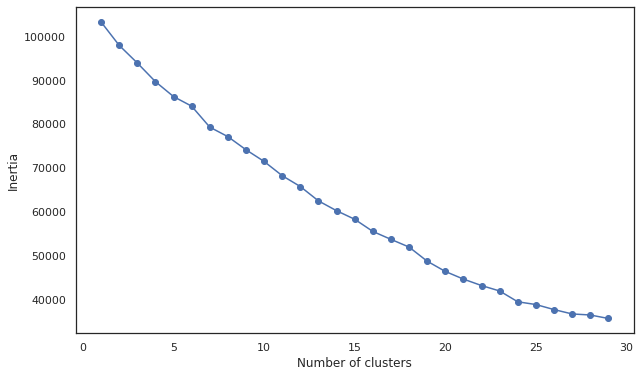

In [308]:

#with scaling
scale=StandardScaler()
X=scale.fit_transform(val)
inertias = []
list_k = list(range(1,30))
from sklearn.cluster import KMeans
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(10, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters')
plt.ylabel('Inertia');

In [309]:
km = KMeans(n_clusters=22)  #k value = 22
km.fit(X)

KMeans(n_clusters=22)

In [310]:
cus_group=pd.DataFrame(km.labels_,columns=['customer_Group']) #grouping by customer
cus_group    

,customer_Group
0,1
1,3
2,3
3,3
4,14
...,...
4302,14
4303,4
4304,1
4305,14


In [311]:
f=pd.concat([df11['Encode_cus'],cus_group],axis=1)
f

,Encode_cus,customer_Group
0,3992,1
1,536,3
2,190,3
3,1034,3
4,2149,14
...,...,...
4302,811,14
4303,2314,4
4304,713,1
4305,1629,14


In [312]:
import plotly.express as px
fig=px.scatter(f,x='Encode_cus',y='customer_Group')
fig.show()

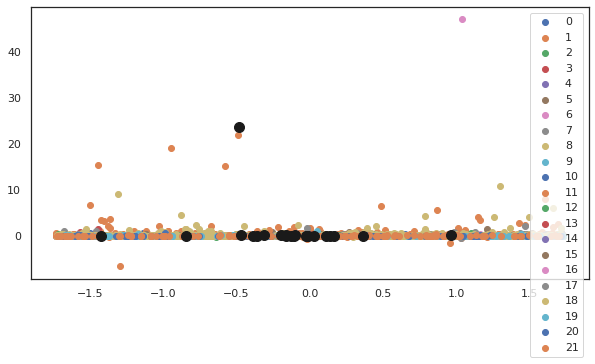

In [313]:
#Getting the Centroids
centroids = km.cluster_centers_
label=km.fit_predict(X)
labels = np.unique(label)
 
#plotting the results:

plt.figure(figsize=(10, 5)) 
for i in labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

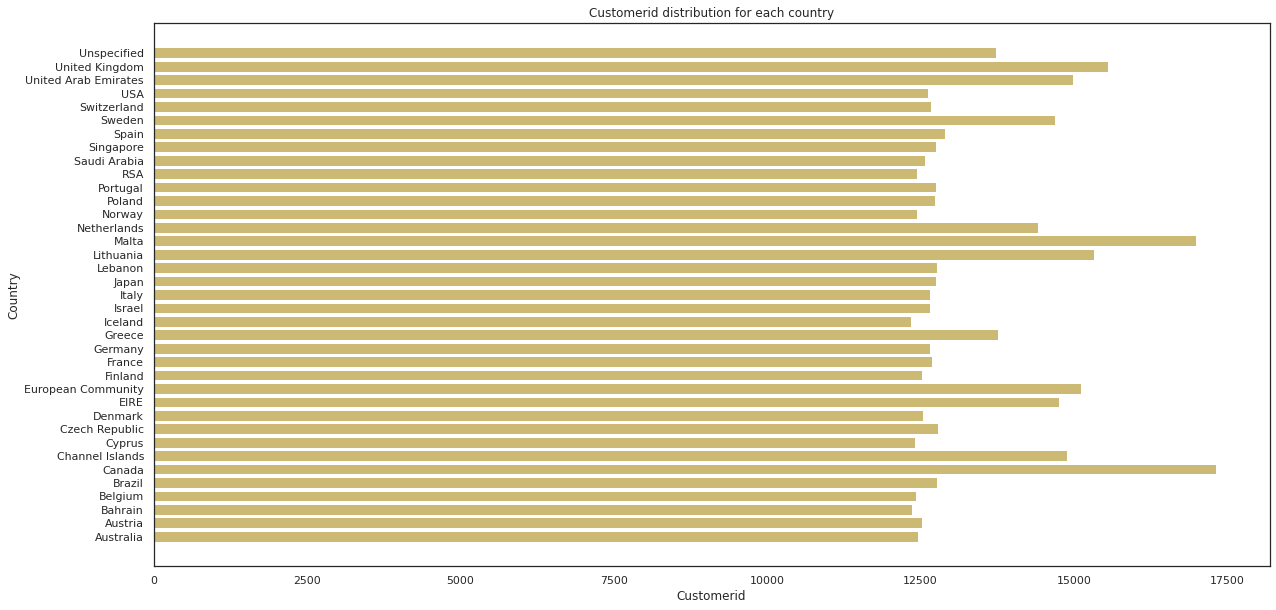

In [171]:
data_country_unitprice = df.groupby('Country')['CustomerID'].mean()

x = data_country_unitprice.values.tolist()
y = data_country_unitprice.index.tolist()

plt.figure(figsize=(20,10))

plt.xlabel("Customerid")
plt.ylabel("Country")

plt.title("Customerid distribution for each country")

plt.barh(y,x,color=['y'])
plt.show()
     

Conclusion:
As per the problem statement, the Customers have been grouped into 21 Groups. From alkalizing the data, a Majority of the customers and transactions come from Middle East Countries.